Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [4]:
# loading the data from csv file to pandas Dataframe
carprice_data = pd.read_csv('car data.csv')

In [5]:
# Inspecting the first 5 rows of the Dataframe
carprice_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# Checking the number of rows and columns
carprice_data.shape

(301, 9)

In [7]:
# getting some information about the dataset
carprice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Checking the number of missing values
carprice_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Checking the distribution of categorical data
print(carprice_data.Fuel_Type.value_counts())
print(carprice_data.Seller_Type.value_counts())
print(carprice_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [10]:
# encoding "Fuel_Type" Column
carprice_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
carprice_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
carprice_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
carprice_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [12]:
X = carprice_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = carprice_data['Selling_Price']

In [13]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# Model Training and Evaluation by Random Forest Regression

1) Linear Regression Model

In [ ]:
# loading the linear regression model
linearRegression=LinearRegression()

In [35]:
linearRegression.fit(X_train,Y_train)

LinearRegression()

Model Evaluation (Training data)

In [21]:
# Prediction on Training data
y_pred = linearRegression.predict(X_train)

In [22]:
# R squared Error
error_score = metrics.r2_score(Y_train, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.87994516604937


Visualize the actual prices and Predicted prices

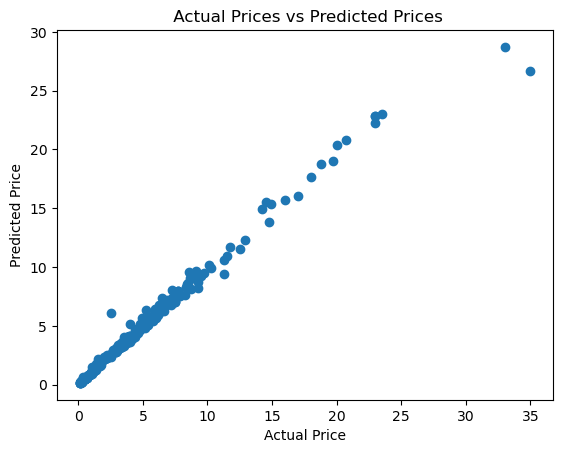

In [30]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Model Evaluation (Testing Data)

In [ ]:
# Prediction on Test data
y_pred = linearRegression.predict(X_test)

In [33]:
# R squared Error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.836576671502476


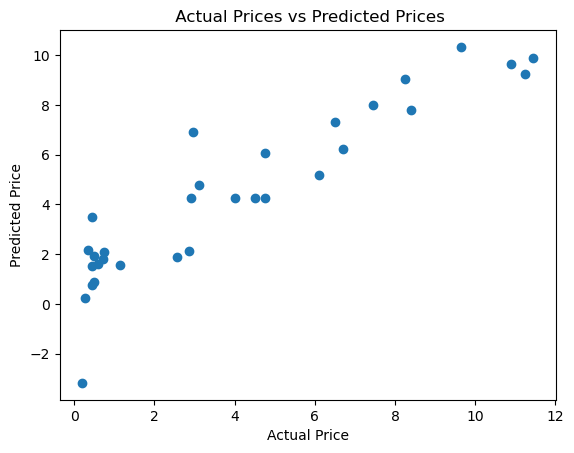

In [34]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2) Random Forest Regression Model

In [24]:
#Import Randon Forest Library
from sklearn.ensemble import RandomForestRegressor

In [26]:
# loading the linear regression model
rf = RandomForestRegressor(n_estimators = 100)

In [27]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation (Training data)

In [37]:
# Prediction on Training data
y_pred = rf.predict(X_train)

In [38]:
# R squared Error
error_score = metrics.r2_score(Y_train, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.9827352661843282


Visualize the actual prices and Predicted prices

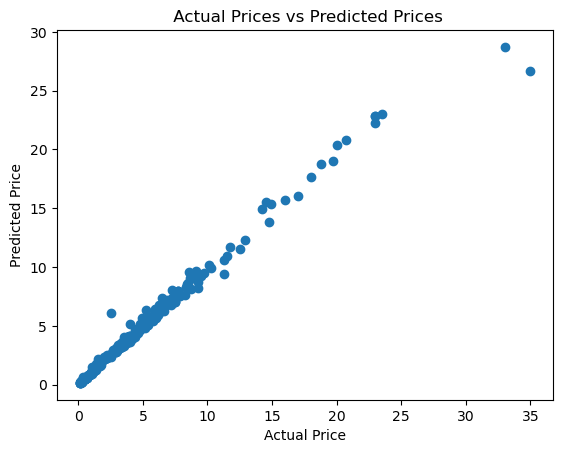

In [39]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Model Evaluation (Testing data)

In [40]:
# Prediction on Testing data
y_pred = rf.predict(X_test)

In [42]:
# R squared Error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.9817778381396997


Visualize the actual prices and Predicted prices

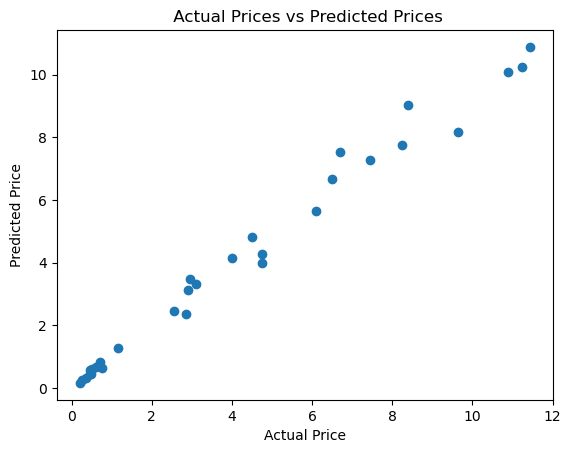

In [44]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Conclusion: